In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [392]:
n_samp = 1_000_000
n1 = np.random.randn(n_samp)
n2 = np.random.randn(n_samp)

s1 = 0.1
s2 = 0.1
r1 = 0.100
r2 = 0.00
m1 = -0.3
m2 = 0.3
n1 = n1 * s1 + m1
n2 = n2 * s2 + m2
p1 = np.exp(n1)
p2 = np.exp(n2)

def exp_from(p1, p2, k, n):
    mask1 =  p1 >= k
    mask2 = p2 >=  k
    # return (np.sum(p1[mask1] * a) + np.sum(p2[mask2]  *b) )/ 20000000
    # np.sum(p1[mask1] - k)
    return (np.sum(p1[mask1] - k) + np.sum(p2[mask2] -k))/ (1 * n)

Done


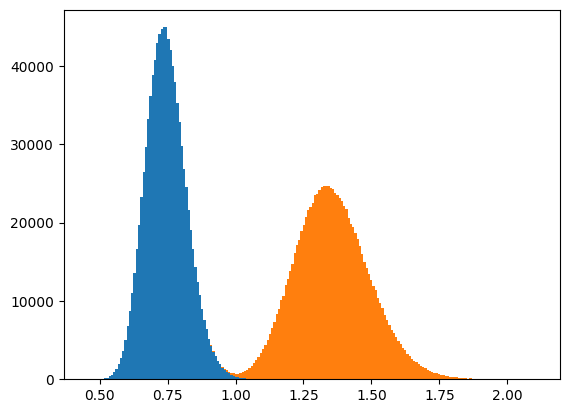

In [393]:
plt.hist([p1, p2] , 200, histtype='barstacked')
print("Done")

2.10108690558798


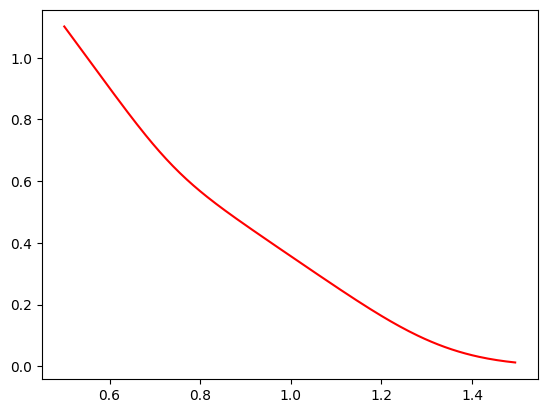

In [402]:
rng = [0 + i/200 for i in range(200)]
rng2 = [0.5+ j / 200 for j in range(200)]
print(exp_from(p1, p2, 0, n_samp))
example = np.array([exp_from(p1, p2, k, n_samp) for k in rng2])
# plt.plot([0.7 + i/200 for i in range(100)], [exp_from(p1, p2, n1, n2, 1, 1, 0.5 + i/100) for i in range(100)])
plt.plot(rng2, example, color='red')
# plt.plot(rng, [scipy.stats.norm.cdf(-((i + 0.1 ))/0.2) for i in rng])

In [403]:
import pipeline
import pandas as pd
from py_vollib.black_scholes import implied_volatility

In [404]:
dfe = pd.DataFrame({'price':example , 'strike':rng2})
print(dfe.columns)

Index(['price', 'strike'], dtype='object')


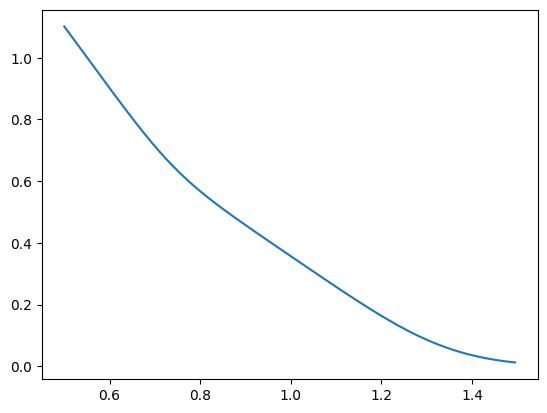

In [405]:
plt.plot(dfe['strike'], dfe['price'])

In [406]:
ivs = dfe.apply(lambda x: implied_volatility.implied_volatility(x['price'], 1, x['strike'], 1, 0, 'c'),axis=1)

AboveMaximumException: The volatility is above the maximum value.

ValueError: x and y must be the same size

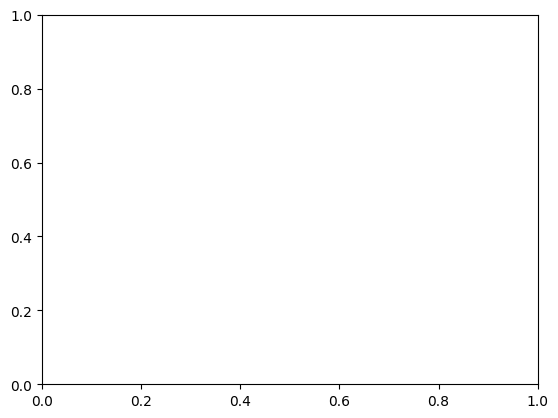

In [407]:
plt.scatter(dfe['strike'],ivs)

In [390]:
import scipy

def bsc(k, S, v, t, r):
    s = v ** 2
    dp = (np.log(S / k) + (r + s/2)*t)/(np.sqrt(s*t))
    dm = dp -np.sqrt(s*t)
    return scipy.stats.norm.cdf(dp)*S - scipy.stats.norm.cdf(dm) * k * np.exp(-r * t)

for i in range(0,len(rng2),10):
    print((bsc(rng2[i], 1, 0.5, 1, 0) - example[i]) / bsc(rng2[i], 1, 0.5, 1, 0))
    print(implied_volatility.implied_volatility(bsc(rng2[i], 1, 0.5, 1, 0), 1, rng2[i], 1, 0, 'c'))
    print(implied_volatility.implied_volatility(example[i], 1, rng2[i], 1, 0, 'c'))
    print("----------")

-0.8887600909576262
0.5000000000000003
1.3534252892985514
----------
-0.8973332000350418
0.5000000000000002
1.234583236602208
----------
-0.8894253231491017
0.49999999999999994
1.1249334989450779
----------
-0.8606375921765901
0.5000000000000001
1.022493059934185
----------
-0.805971555469745
0.49999999999999994
0.9256819262537749
----------
-0.7200928477786286
0.4999999999999999
0.8332965179542311
----------
-0.5983885160854707
0.4999999999999996
0.7447184921262366
----------
-0.4389671209860477
0.5000000000000001
0.6601692471592637
----------
-0.2453909305758195
0.4999999999999999
0.5808470863482709
----------
-0.02848779738450517
0.5
0.5086011351980116
----------


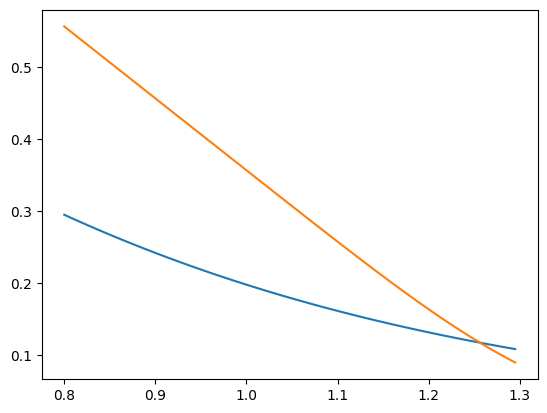

In [391]:
plt.plot(rng2, [bsc(k, 1, 0.5, 1, 0.00) for k in rng2])
plt.plot(rng2, example)

[0.4999999999999996, 0.49999999999999983, 0.5, 0.49999999999999983, 0.5000000000000001, 0.5000000000000002, 0.5000000000000003, 0.4999999999999997, 0.4999999999999996, 0.4999999999999996, 0.49999999999999983, 0.5000000000000001, 0.5000000000000001, 0.5000000000000002, 0.5000000000000001, 0.5000000000000001, 0.4999999999999996, 0.5000000000000009, 0.5000000000000004, 0.5000000000000002, 0.5000000000000003, 0.49999999999999983, 0.5000000000000001, 0.5, 0.4999999999999999, 0.4999999999999998, 0.5000000000000003, 0.4999999999999999, 0.5, 0.5000000000000002, 0.5000000000000006, 0.4999999999999996, 0.49999999999999994, 0.5, 0.5000000000000001, 0.5, 0.5000000000000001, 0.5000000000000001, 0.4999999999999997, 0.4999999999999998, 0.4999999999999999, 0.5000000000000003, 0.5000000000000001, 0.4999999999999999, 0.5000000000000003, 0.5, 0.5000000000000002, 0.4999999999999997, 0.4999999999999999, 0.5000000000000006]


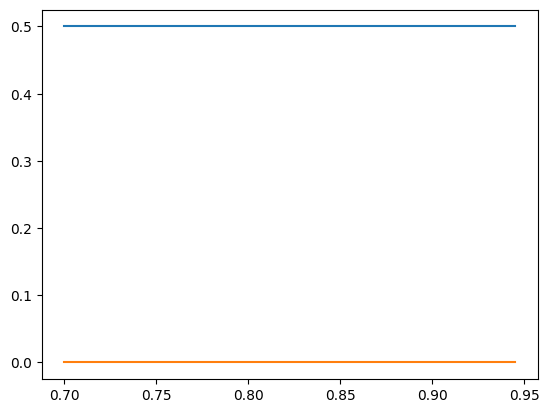

In [259]:
import importlib
importlib.reload(plt)
# plt.plot(ks, [bsc(k, 1, 0.2, 1, 0) for k in ks])
vols = [implied_volatility.implied_volatility(bsc(k, 1, 0.5, 1, 0.00), 1, k, 1, 0.00, 'c') for k in ks]
print(vols)
plt.plot(ks, vols)
plt.plot(ks, [0 for k in ks ])